In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [3]:
company=pd.read_csv("C:\\Users\\lenovo\\Downloads\\Company_Data (2).csv")

In [4]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


# EDA

In [5]:
#checking missing value
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


# No null values are here

In [6]:
#checking duplicacated value
company[company.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


# No duplicated value

<AxesSubplot:xlabel='Sales', ylabel='Density'>

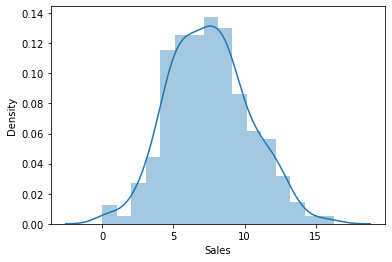

In [7]:
sns.distplot(company['Sales'])

<AxesSubplot:xlabel='CompPrice', ylabel='Density'>

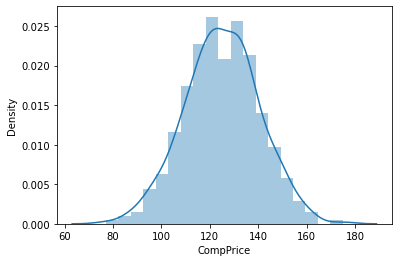

In [8]:
sns.distplot(company['CompPrice'])

<AxesSubplot:xlabel='Income', ylabel='Density'>

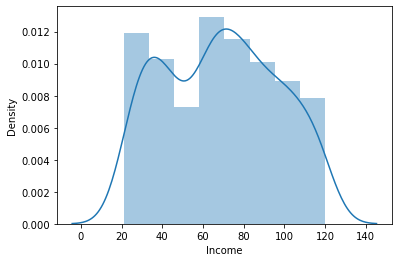

In [9]:
sns.distplot(company['Income'])

<AxesSubplot:xlabel='Advertising', ylabel='Density'>

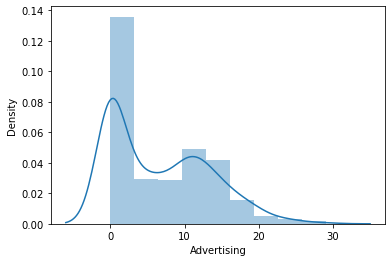

In [10]:
sns.distplot(company['Advertising'])

<AxesSubplot:xlabel='Population', ylabel='Density'>

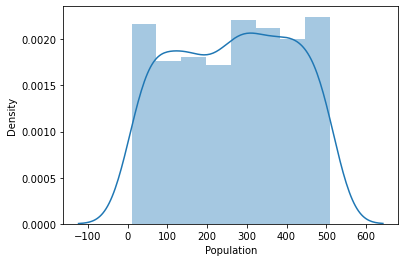

In [11]:
sns.distplot(company['Population'])

<AxesSubplot:xlabel='Price', ylabel='Density'>

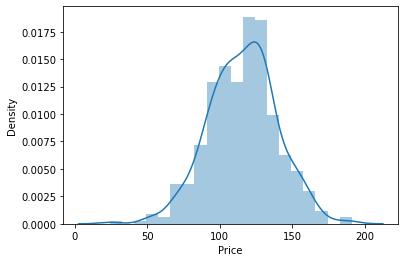

In [12]:
sns.distplot(company['Price'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

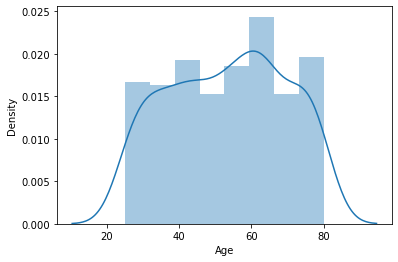

In [13]:
sns.distplot(company['Age'])

<AxesSubplot:xlabel='Education', ylabel='Density'>

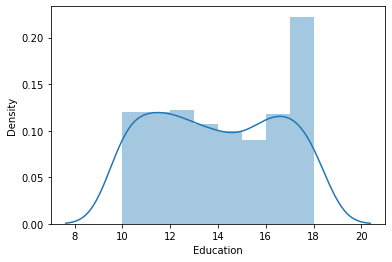

In [14]:
sns.distplot(company['Education'])

In [15]:
company['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [16]:
company['Urban'].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [17]:
company['US'].value_counts()

Yes    258
No     142
Name: US, dtype: int64

# using label encoder for the categorical data

sheveLoc-bed = 0,good=1,medium=2.Urban-no=0,yes=1.US-no=0,yes=1

In [18]:
label_encoder = preprocessing.LabelEncoder()
company['ShelveLoc']=label_encoder.fit_transform(company['ShelveLoc'])
company['Urban']=label_encoder.fit_transform(company['Urban'])
company['US']=label_encoder.fit_transform(company['US'])


In [19]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


# Spliting independant and dependant variables

In [20]:
d=company.iloc[:,1]
x=company.iloc[:,1:]

In [21]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [22]:
d

0      138
1      111
2      113
3      117
4      141
      ... 
395    138
396    139
397    162
398    100
399    134
Name: CompPrice, Length: 400, dtype: int64

# Binning the sales data unto 4 bins

In [23]:
y=d.copy()

In [24]:
m=pd.cut(y,bins=4)

In [25]:
m.value_counts()

(101.5, 126.0]     189
(126.0, 150.5]     167
(76.902, 101.5]     26
(150.5, 175.0]      18
Name: CompPrice, dtype: int64

In [26]:
y

0      138
1      111
2      113
3      117
4      141
      ... 
395    138
396    139
397    162
398    100
399    134
Name: CompPrice, Length: 400, dtype: int64

In [27]:
y=m

# Label encoder for sales column

In [28]:
y

0       (126.0, 150.5]
1       (101.5, 126.0]
2       (101.5, 126.0]
3       (101.5, 126.0]
4       (126.0, 150.5]
            ...       
395     (126.0, 150.5]
396     (126.0, 150.5]
397     (150.5, 175.0]
398    (76.902, 101.5]
399     (126.0, 150.5]
Name: CompPrice, Length: 400, dtype: category
Categories (4, interval[float64, right]): [(76.902, 101.5] < (101.5, 126.0] < (126.0, 150.5] < (150.5, 175.0]]

In [29]:
le=preprocessing.LabelEncoder()

In [30]:
y=le.fit_transform(y)

In [31]:
y

array([2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2,
       2, 1, 2, 2, 1, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 3, 0, 1,
       0, 2, 2, 1, 1, 3, 0, 1, 3, 1, 2, 2, 2, 0, 1, 1, 1, 1, 2, 1, 0, 1,
       2, 1, 2, 2, 0, 2, 1, 1, 2, 0, 1, 1, 2, 2, 1, 1, 3, 1, 1, 1, 2, 2,
       1, 2, 1, 0, 1, 2, 1, 2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 0, 3, 1, 2, 2, 0, 1,
       1, 2, 2, 0, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2,
       2, 0, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 0, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 3, 1, 2, 1, 1, 2, 1,
       1, 1, 2, 2, 1, 2, 3, 1, 3, 1, 0, 0, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 1, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 3, 1, 1, 3, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1,
       2, 2, 2, 2, 1, 3, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2,
       1, 0, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1,

In [32]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=40)

In [33]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(320, 10) (80, 10) (320,) (80,)


# Build Decision Tree classifire using Entropy Criteria

In [34]:
model = DecisionTreeClassifier(criterion = "entropy",max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

# plotting graph

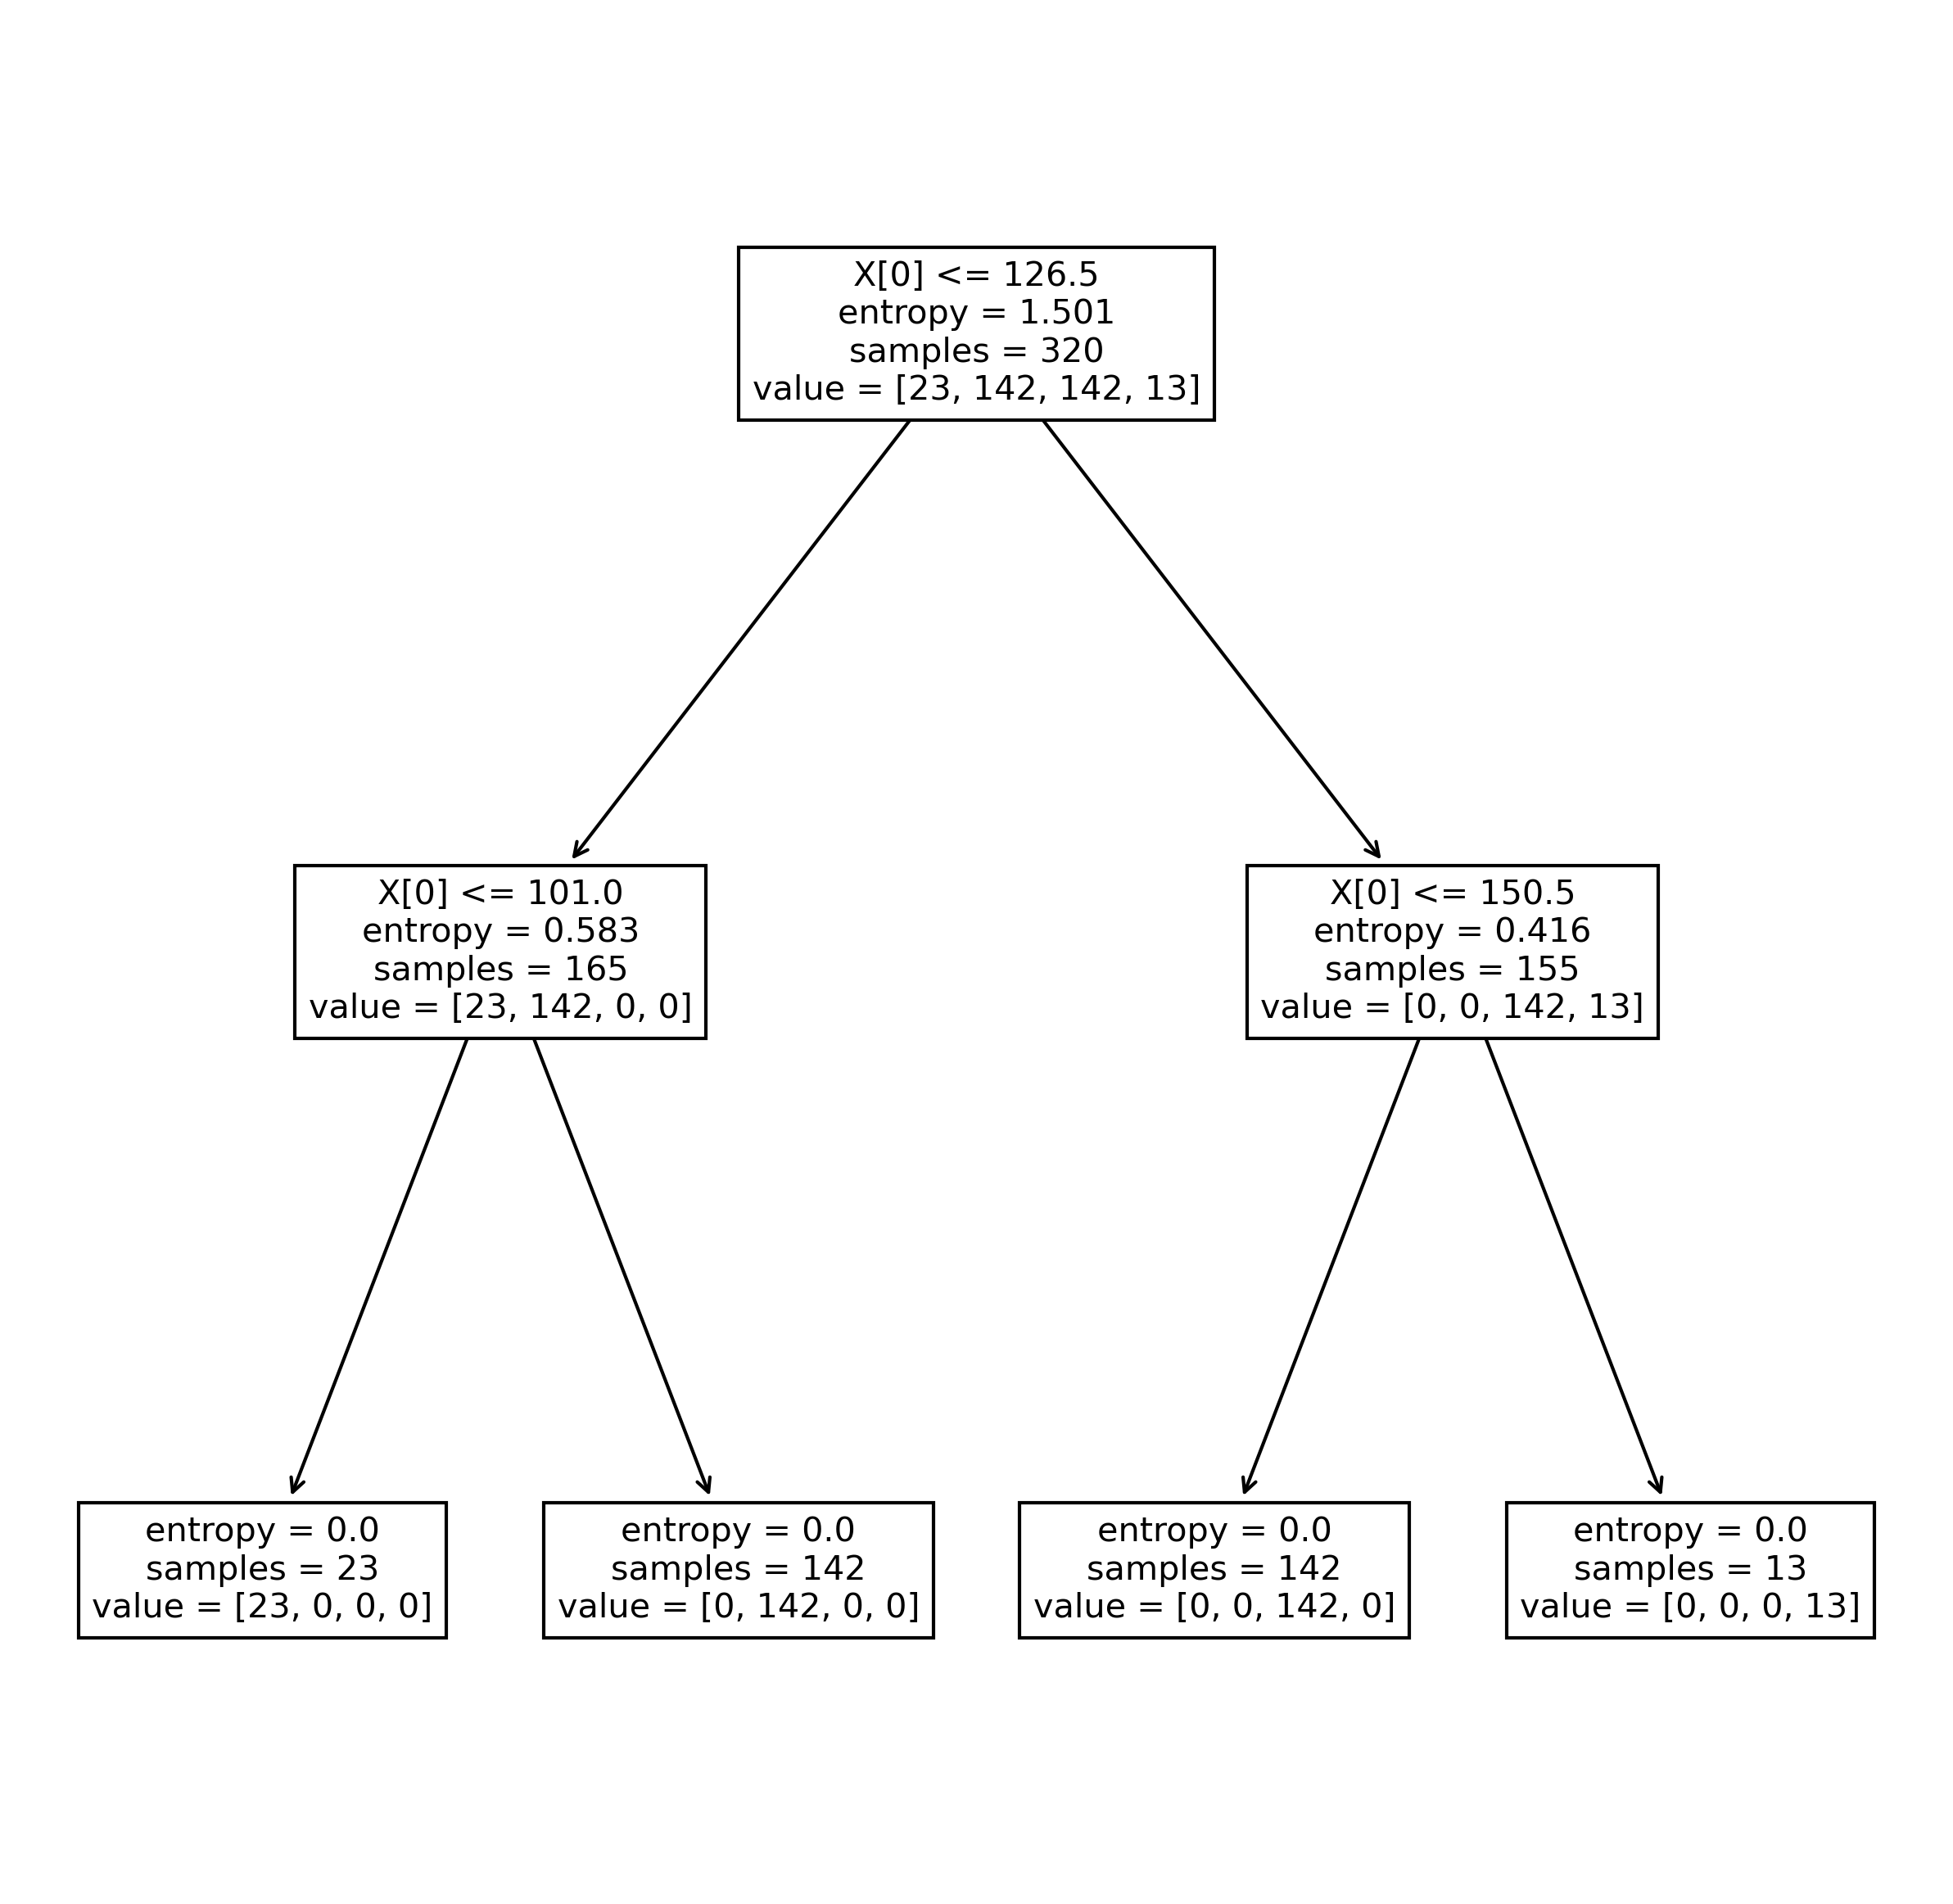

In [35]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(10,10),dpi=300)
tree.plot_tree(model);

The classification is only depended upon the the competitor price

In [36]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [37]:
preds=model.predict(x_test)
pd.Series(preds).value_counts()

1    47
2    25
3     5
0     3
dtype: int64

In [38]:
pd.crosstab(y_test,preds)

col_0,0,1,2,3
row_0,,,,
0,3,0,0,0
1,0,47,0,0
2,0,0,25,0
3,0,0,0,5


In [39]:
np.mean(preds==y_test)

1.0

The classification is very highy accurancy

# Trying 6 bins

In [40]:
y=d.copy()

In [41]:
m=pd.cut(y,bins=6)

In [42]:
y=m

In [43]:
le=preprocessing.LabelEncoder()

In [44]:
y=le.fit_transform(y)

In [45]:
y

array([3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 2, 2, 2, 2, 1, 4, 2, 4, 2, 3, 2, 3,
       3, 2, 4, 3, 1, 1, 1, 1, 2, 3, 1, 2, 2, 3, 2, 2, 1, 3, 2, 4, 0, 2,
       0, 3, 3, 2, 2, 4, 1, 2, 4, 1, 3, 4, 3, 0, 1, 2, 2, 1, 3, 2, 1, 2,
       3, 2, 4, 3, 0, 4, 2, 2, 4, 0, 1, 2, 3, 3, 2, 2, 4, 1, 2, 2, 4, 3,
       2, 3, 2, 1, 2, 4, 2, 3, 4, 5, 2, 2, 2, 3, 2, 2, 2, 1, 1, 3, 1, 2,
       3, 3, 2, 3, 2, 3, 3, 4, 2, 3, 3, 2, 2, 3, 3, 0, 4, 2, 3, 4, 1, 1,
       2, 3, 3, 1, 3, 3, 2, 4, 3, 3, 2, 2, 3, 4, 2, 3, 2, 2, 2, 2, 3, 4,
       3, 1, 4, 2, 3, 2, 2, 4, 2, 3, 4, 4, 2, 1, 3, 1, 3, 0, 1, 3, 3, 2,
       3, 3, 1, 4, 3, 2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 4, 1, 3, 2, 2, 3, 2,
       2, 2, 4, 3, 2, 3, 4, 2, 5, 2, 0, 1, 2, 2, 4, 4, 2, 2, 3, 1, 3, 2,
       3, 2, 3, 2, 3, 1, 2, 2, 4, 1, 2, 3, 3, 2, 2, 2, 3, 4, 2, 2, 5, 3,
       2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 3, 2, 1, 2, 4, 2, 1, 2, 3, 2, 2, 2,
       3, 3, 3, 3, 2, 5, 2, 2, 2, 2, 3, 1, 3, 3, 2, 3, 2, 2, 4, 3, 1, 4,
       2, 1, 2, 4, 1, 2, 2, 2, 4, 2, 3, 2, 4, 3, 2,

In [46]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=40)

In [47]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(320, 10) (80, 10) (320,) (80,)


In [48]:
model = DecisionTreeClassifier(criterion = "entropy",max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

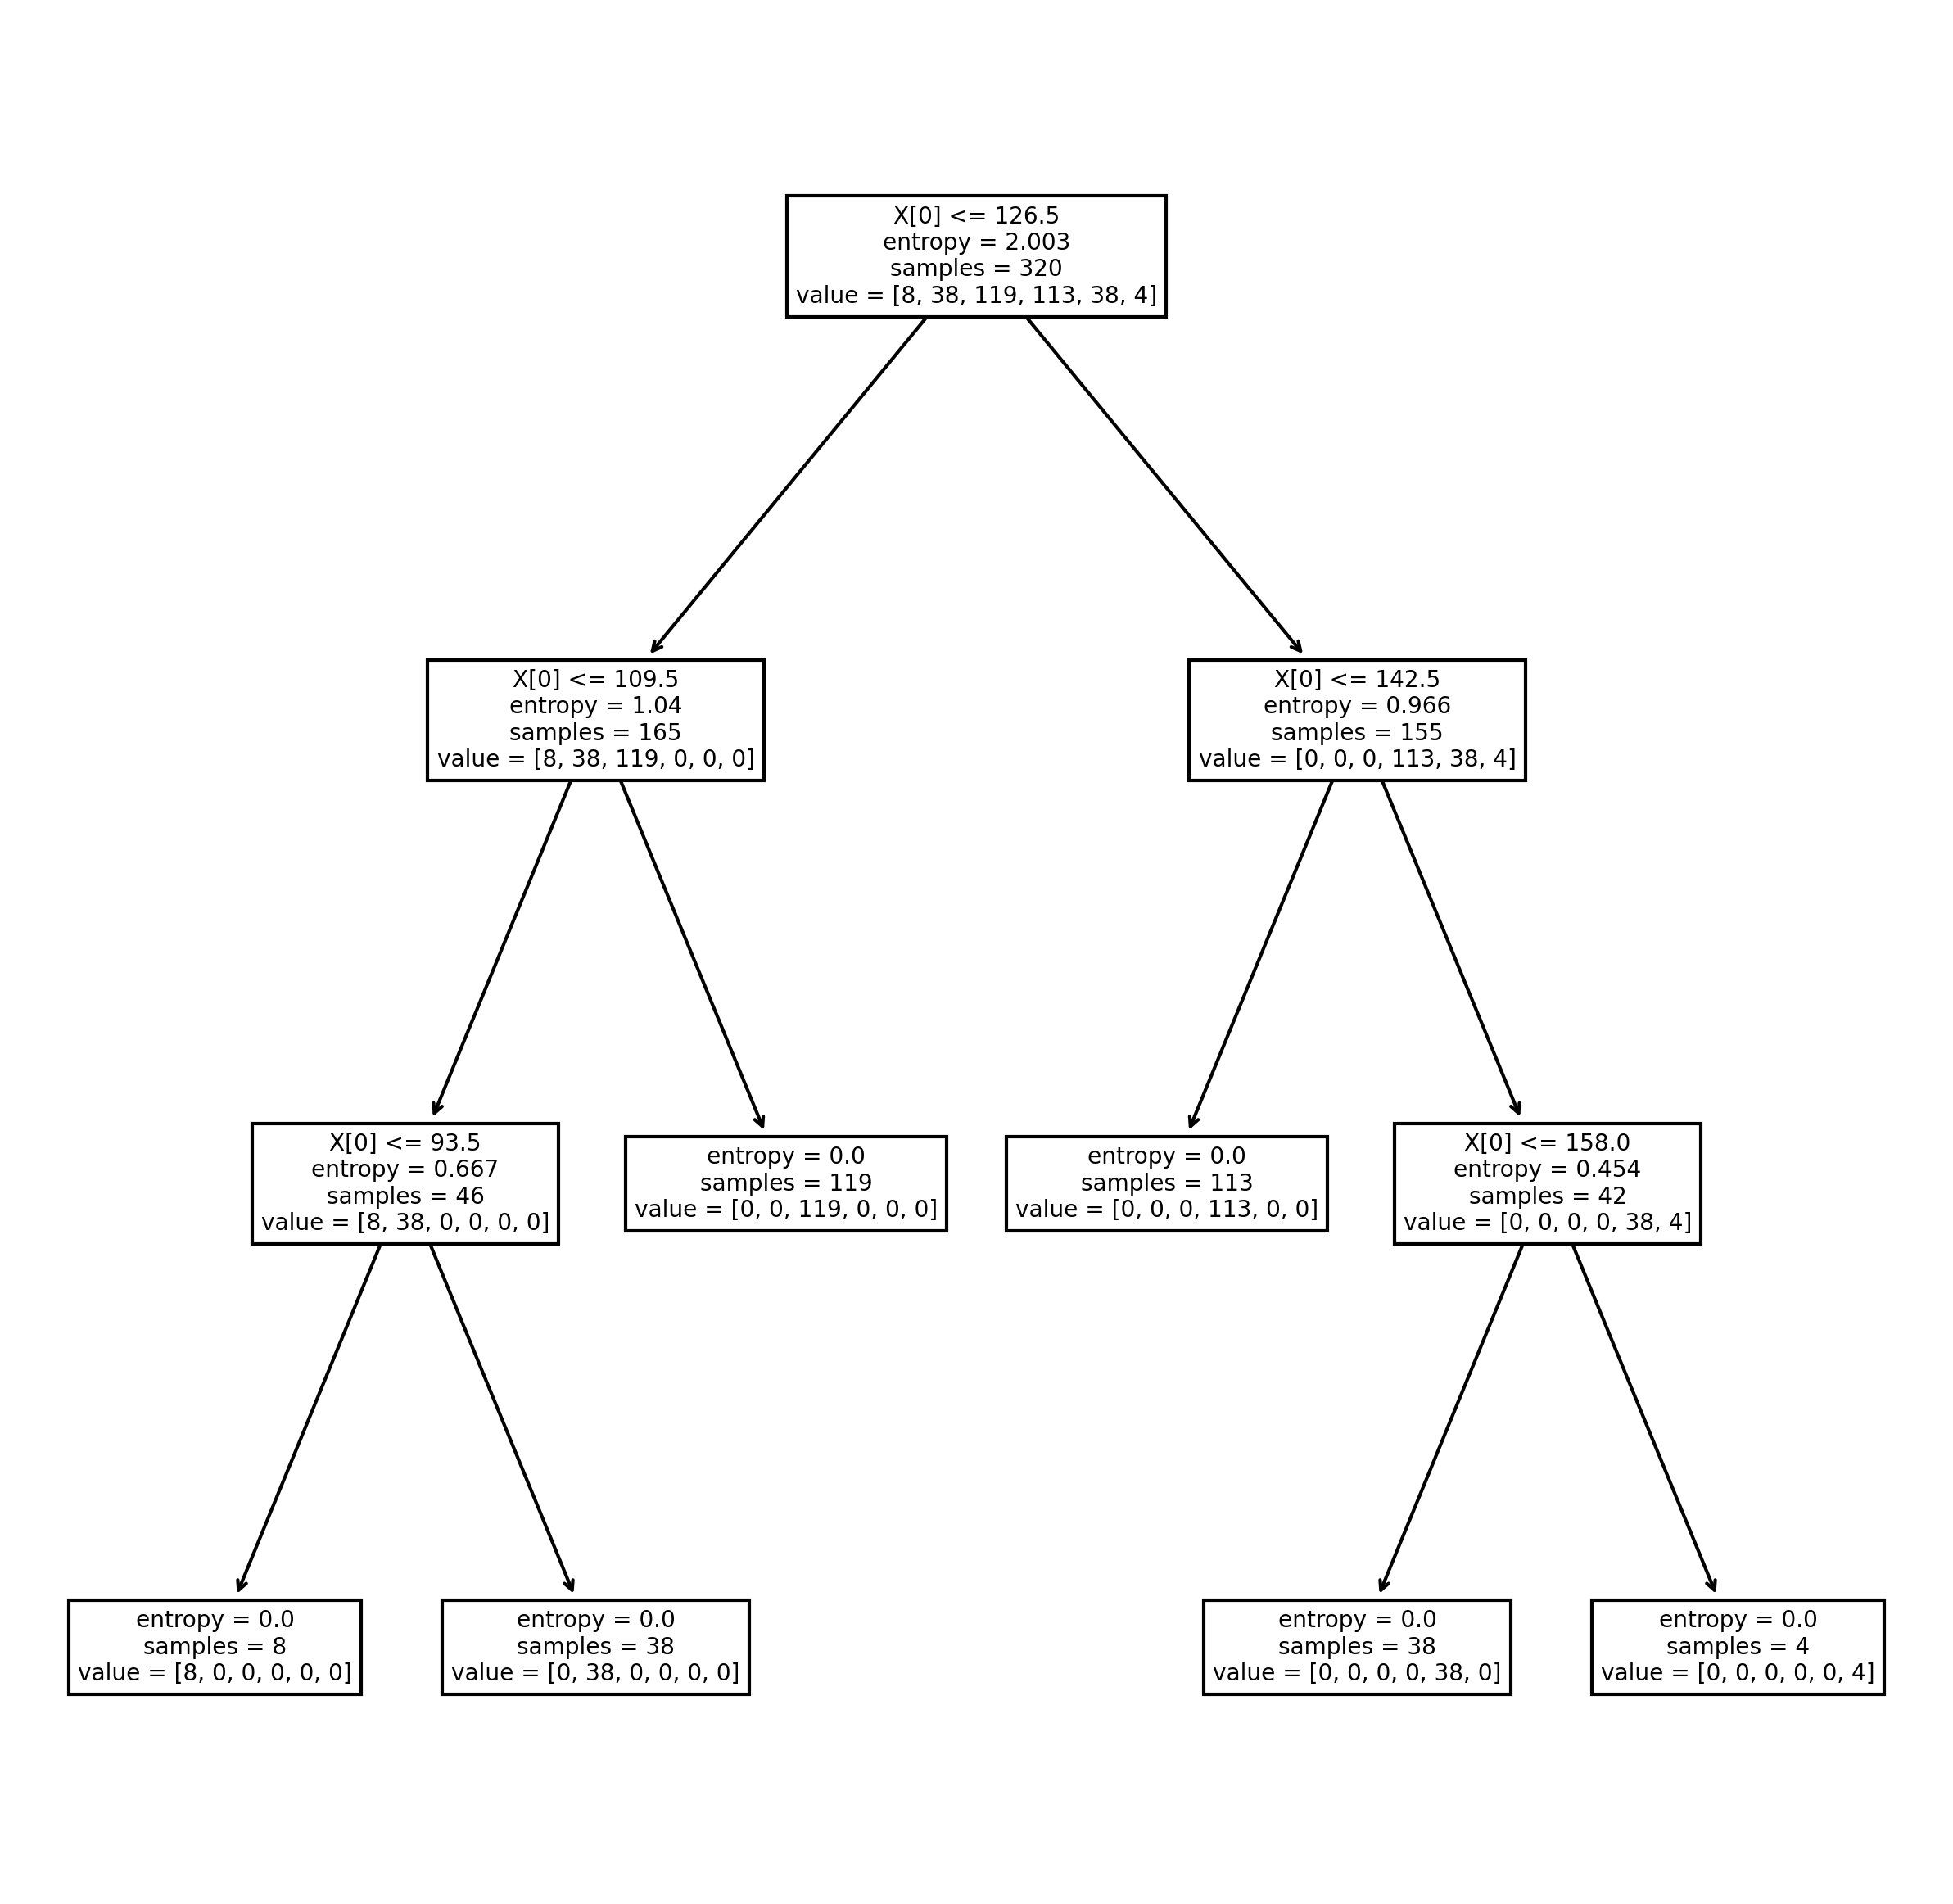

In [49]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(10,10),dpi=300)
tree.plot_tree(model);

In [50]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

2    33
3    22
1    16
4     6
5     2
0     1
dtype: int64

In [51]:
pd.crosstab(y_test,preds)

col_0,0,1,2,3,4,5
row_0,,,,,,
0,1,0,0,0,0,0
1,0,16,0,0,0,0
2,0,0,33,0,0,0
3,0,0,0,22,0,0
4,0,0,0,0,6,0
5,0,0,0,0,0,2


In [52]:
np.mean(preds==y_test)

1.0